# Text Classification with Machine Learning

## Agenda

1. Model building in scikit-learn (refresher)
2. Representing text as numerical data
3. Reading a text-based dataset into pandas
4. Vectorizing our dataset
5. Building and evaluating a model
6. Comparing models
7. Examining a model for further insight
8. Tuning the vectorizer

## 1: Model building in scikit-learn

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/

MyDrive  Othercomputers


In [3]:
!cd '/content/drive/MyDrive/Northwestern MS/453 - Natural Language Processing/Module 2/Module2LabCodes'

In [4]:
!ls '/content/drive/MyDrive/Northwestern MS/453 - Natural Language Processing/Module 2/Module2LabCodes'

Lab0_textClassificationWithML.ipynb  Lab2_textClassificationWithAdvancedML.ipynb  spam.csv
Lab1_tfIdf_Example_v1.ipynb	     Lab3_textPreprocessing.ipynb		  yelp.csv


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# load the iris dataset as an example
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target

**"Features"** are also known as predictors, inputs, or attributes. The **"response"** is also known as the target, label, or output.

In [8]:
# check the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


**"Observations"** are also known as samples, instances, or records.

In [9]:
# examine the first 5 rows of the feature matrix (including the feature names)
import pandas as pd
pd.DataFrame(X, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
# examine the response vector
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In order to **build a model**, the features must be **numeric**, and every observation must have the **same features in the same order**.

In [11]:
# import the class
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model (with the default parameters)
knn = KNeighborsClassifier()

# fit the model with data (occurs in-place)
knn.fit(X, y)

KNeighborsClassifier()

In order to **make a prediction**, the new observation must have the **same features as the training observations**, both in number and meaning.

In [12]:
# predict the response for a new observation
knn.predict([[3, 5, 4, 2]])

array([1])

## 2: Representing text as numerical data

In [13]:
# example text for model training (SMS messages)
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [14]:
# example response vector
y = [0, 0, 1]

We will use [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to "convert text into a matrix of token counts":

In [15]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vect = CountVectorizer(ngram_range=(1, 1))

In [17]:
# learn the 'vocabulary' of the training data
vect.fit(simple_train)

CountVectorizer()

In [18]:
# examine the fitted vocabulary
vect.get_feature_names_out()

array(['cab', 'call', 'me', 'please', 'tonight', 'you'], dtype=object)

In [19]:
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [20]:
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [21]:
# convert sparse matrix to a dense matrix
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]])

In [22]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [23]:
# check the type of the document-term matrix
type(simple_train_dtm)

scipy.sparse._csr.csr_matrix

In [24]:
# examine the sparse matrix contents
print(simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


> As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have **many feature values that are zeros** (typically more than 99% of them).

> For instance, a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

> In order to be able to **store such a matrix in memory** but also to **speed up operations**, implementations will typically use a **sparse representation** such as the implementations available in the `scipy.sparse` package.

In [25]:
# Build a model to predict the target
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(simple_train_dtm, y)

KNeighborsClassifier(n_neighbors=1)

In [27]:
# example text for model testing
simple_test = ["please don't call me"]

In order to **make a prediction**, the new observation must have the **same features as the training observations**, both in number and meaning.

In [28]:
# transform testing data into a document-term matrix (using existing vocabulary)
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]])

In [29]:
# Test built model
knn.predict(simple_test_dtm)

array([1])

In [30]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


**Summary:**

- `vect.fit(train)` **learns the vocabulary** of the training data
- `vect.transform(train)` uses the **fitted vocabulary** to build a document-term matrix from the training data
- `vect.transform(test)` uses the **fitted vocabulary** to build a document-term matrix from the testing data and **ignores tokens** it hasn't seen before

## 3: Reading a text-based dataset into pandas

In [31]:
# read file into pandas using a relative path
sms = pd.read_csv('/content/drive/MyDrive/Northwestern MS/453 - Natural Language Processing/Module 2/Module2LabCodes/spam.csv', header=None, encoding='ISO-8859-1', names=['label', 'message'])

In [32]:
# examine the shape
sms.shape

(5572, 2)

In [33]:
# examine the first 10 rows
sms.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [34]:
# examine the class distribution
sms.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [35]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})

In [36]:
# check that the conversion worked
sms.head(5)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [37]:
# how to define X and y (from the iris data) to use with a MODEL
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [38]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = sms.message
y = sms.label_num
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [39]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


##  4: Vectorizing our dataset

In [41]:
# instantiate the vectorizer
vect = CountVectorizer()

In [42]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [43]:
# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

In [44]:
# examine the document-term matrix
X_train_dtm

<4179x7370 sparse matrix of type '<class 'numpy.int64'>'
	with 55411 stored elements in Compressed Sparse Row format>

In [45]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)

In [46]:
X_test_dtm

<1393x7370 sparse matrix of type '<class 'numpy.int64'>'
	with 17076 stored elements in Compressed Sparse Row format>

## 5: Building and evaluating a model

In [47]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

In [48]:
nb = MultinomialNB()

In [49]:
# train the model using X_train_dtm
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [50]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [51]:
# calculate accuracy of class predictions
from sklearn import metrics

In [52]:
metrics.accuracy_score(y_test, y_pred_class)

0.9791816223977028

In [53]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1194,    4],
       [  25,  170]])

In [54]:
# print message text for the false positives (ham incorrectly classified as spam)
X_test[y_test < y_pred_class]

5475    Dhoni have luck to win some big title.so we wi...
4555                              Gettin rdy to ship comp
3888                    Unlimited texts. Limited minutes.
215     Finally the match heading towards draw as your...
Name: message, dtype: object

In [55]:
# print message text for the false negatives (spam incorrectly classified as ham)
X_test[y_test > y_pred_class]

1457    CLAIRE here am havin borin time & am now alone...
683     Hi I'm sue. I am 20 years old and work as a la...
2821    ROMCAPspam Everyone around should be respondin...
954             Filthy stories and GIRLS waiting for your
2574    Your next amazing xxx PICSFREE1 video will be ...
2698                            FROM 88066 LOST å£12 HELP
750     Do you realize that in about 40 years, we'll h...
2268                    88066 FROM 88066 LOST 3POUND HELP
5035    You won't believe it but it's true. It's Incre...
5449    Latest News! Police station toilet stolen, cop...
3528    Xmas & New Years Eve tickets are now on sale f...
4674    Hi babe its Chloe, how r u? I was smashed on s...
1637    0A$NETWORKS allow companies to bill for SMS, s...
3862    Oh my god! I've found your number again! I'm s...
68      Did you hear about the new \Divorce Barbie\"? ...
2246    Hi ya babe x u 4goten bout me?' scammers getti...
868     Hello. We need some posh birds and chaps to us...
4014    You wi

In [56]:
# example false negative
X_test[3132]

'So no messages. Had food?'

In [57]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]

In [58]:
y_pred_prob

array([3.34508751e-12, 1.11004018e-11, 2.56176257e-05, ...,
       2.35023552e-11, 1.27273516e-04, 5.18699512e-05])

In [59]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9727194897478704

## 6: Comparing models

We will compare multinomial Naive Bayes with [logistic regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

In [60]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression

In [61]:
logreg = LogisticRegression()

In [62]:
# train the model using X_train_dtm
logreg.fit(X_train_dtm, y_train)

LogisticRegression()

In [63]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [64]:
# calculate predicted probabilities for X_test_dtm
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]

In [65]:
y_pred_prob

array([0.00051566, 0.00344954, 0.00582791, ..., 0.00021348, 0.01460737,
       0.00539899])

In [66]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.9777458722182341

In [67]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9817687598989769

##  7: Examining a model for further insight

We will examine our **trained Naive Bayes model** to calculate the approximate **"spamminess" of each token**.

In [68]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names_out()

In [69]:
len(X_train_tokens)

7370

In [70]:
# examine the first 50 tokens
print(X_train_tokens[0:50])

['00' '000' '008704050406' '0089' '0121' '01223585236' '01223585334'
 '0125698789' '02' '0207' '02072069400' '02073162414' '02085076972' '021'
 '03' '04' '0430' '05' '050703' '0578' '06' '07' '07008009200'
 '07046744435' '07090201529' '07090298926' '07123456789' '0721072'
 '07732584351' '07734396839' '07742676969' '0776xxxxxxx' '07781482378'
 '07786200117' '077xxx' '078' '07801543489' '07808' '07808247860'
 '07815296484' '07821230901' '078498' '07880867867' '0789xxxxxxx'
 '07946746291' '0796xxxxxx' '07973788240' '07xxxxxxxxx' '08' '0800']


In [71]:
# examine the last 50 tokens
print(X_train_tokens[-50:])

['younger' 'youphone' 'your' 'youre' 'yourjob' 'yours' 'yourself'
 'youuuuu' 'youwanna' 'youåõre' 'yoville' 'yr' 'yrs' 'ystrday' 'ything'
 'yummmm' 'yummy' 'yun' 'yunny' 'yuo' 'yuou' 'yup' 'yupz' 'zac' 'zaher'
 'zealand' 'zebra' 'zed' 'zeros' 'zhong' 'zindgi' 'zoe' 'zoom' 'zouk'
 'zyada' 'åòharry' 'åòit' 'ì_' 'ì¼1' 'ìä' 'ìï' 'ó_' 'û_' 'û_thanks' 'ûªm'
 'ûªt' 'ûªve' 'ûï' 'ûò' 'ûówell']


In [72]:
# Naive Bayes counts the number of times each token appears in each class
nb.feature_count_

array([[ 0.,  0.,  0., ...,  0.,  8.,  1.],
       [ 8., 17.,  2., ...,  1.,  0.,  0.]])

In [73]:
# rows represent classes, columns represent tokens
nb.feature_count_.shape

(2, 7370)

In [74]:
# number of times each token appears across all HAM messages
ham_token_count = nb.feature_count_[0, :]
ham_token_count

array([0., 0., 0., ..., 0., 8., 1.])

In [75]:
# number of times each token appears across all SPAM messages
spam_token_count = nb.feature_count_[1, :]
spam_token_count

array([ 8., 17.,  2., ...,  1.,  0.,  0.])

In [76]:
# create a DataFrame of tokens with their separate ham and spam counts
tokens = pd.DataFrame({'token':X_train_tokens, 'ham':ham_token_count, 'spam':spam_token_count}).set_index('token')
tokens.head()

,ham,spam
token,,
00,0.0,8.0
000,0.0,17.0
008704050406,0.0,2.0
0089,0.0,1.0
0121,0.0,1.0


In [77]:
# examine 5 random DataFrame rows
tokens.sample(5, random_state=6)

,ham,spam
token,,
sighs,3.0,0.0
grahmbell,2.0,0.0
vibrant,1.0,0.0
vodafone,0.0,5.0
difficult,12.0,0.0


In [78]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

array([3627.,  552.])

Before we can calculate the "spamminess" of each token, we need to avoid **dividing by zero** and account for the **class imbalance**.

In [79]:
# add 1 to ham and spam counts to avoid dividing by 0
tokens['ham'] = tokens.ham + 1
tokens['spam'] = tokens.spam + 1
tokens.sample(5, random_state=6)

,ham,spam
token,,
sighs,4.0,1.0
grahmbell,3.0,1.0
vibrant,2.0,1.0
vodafone,1.0,6.0
difficult,13.0,1.0


In [80]:
# convert the ham and spam counts into frequencies
tokens['ham'] = tokens.ham / nb.class_count_[0]
tokens['spam'] = tokens.spam / nb.class_count_[1]
tokens.sample(5, random_state=6)

,ham,spam
token,,
sighs,0.001103,0.001812
grahmbell,0.000827,0.001812
vibrant,0.000551,0.001812
vodafone,0.000276,0.010870
difficult,0.003584,0.001812


In [81]:
# calculate the ratio of spam-to-ham for each token
tokens['spam_ratio'] = tokens.spam / tokens.ham
tokens.sample(5, random_state=6)

,ham,spam,spam_ratio
token,,,
sighs,0.001103,0.001812,1.642663
grahmbell,0.000827,0.001812,2.190217
vibrant,0.000551,0.001812,3.285326
vodafone,0.000276,0.010870,39.423913
difficult,0.003584,0.001812,0.505435


In [82]:
# examine the DataFrame sorted by spam_ratio
tokens.sort_values('spam_ratio', ascending=False)

,ham,spam,spam_ratio
token,,,
claim,0.000276,0.153986,558.505435
150p,0.000276,0.114130,413.951087
prize,0.000276,0.110507,400.809783
tone,0.000276,0.094203,341.673913
18,0.000276,0.072464,262.826087
...,...,...,...
lor,0.033637,0.001812,0.053858
she,0.036118,0.001812,0.050158
he,0.044941,0.001812,0.040311


In [83]:
# look up the spam_ratio for a given token
tokens.loc['dating', 'spam_ratio']

98.55978260869566

## 8: Tuning the vectorizer

Thus far, we have been using the default parameters of [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html):

In [84]:
# show default parameters for CountVectorizer
vect

CountVectorizer()

However, the vectorizer is worth tuning, just like a model is worth tuning! Here are a few parameters that you might want to tune:

- **stop_words:** string {'english'}, list, or None (default)
    - If 'english', a built-in stop word list for English is used.
    - If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
    - If None, no stop words will be used.

In [85]:
# remove English stop words
vect = CountVectorizer(stop_words='english')

- **ngram_range:** tuple (min_n, max_n), default=(1, 1)
    - The lower and upper boundary of the range of n-values for different n-grams to be extracted.
    - All values of n such that min_n <= n <= max_n will be used.

In [86]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))

- **max_df:** float in range [0.0, 1.0] or int, default=1.0
    - When building the vocabulary, ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
    - If float, the parameter represents a proportion of documents.
    - If integer, the parameter represents an absolute count.

In [87]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)

In [88]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)

**Guidelines for tuning CountVectorizer:**

- Use your knowledge of the **problem** and the **text**, and your understanding of the **tuning parameters**, to help you decide what parameters to tune and how to tune them.
- **Experiment**, and let the data tell you the best approach!

# Word Cloud

In [89]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python

In [90]:
sms.head(2)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0


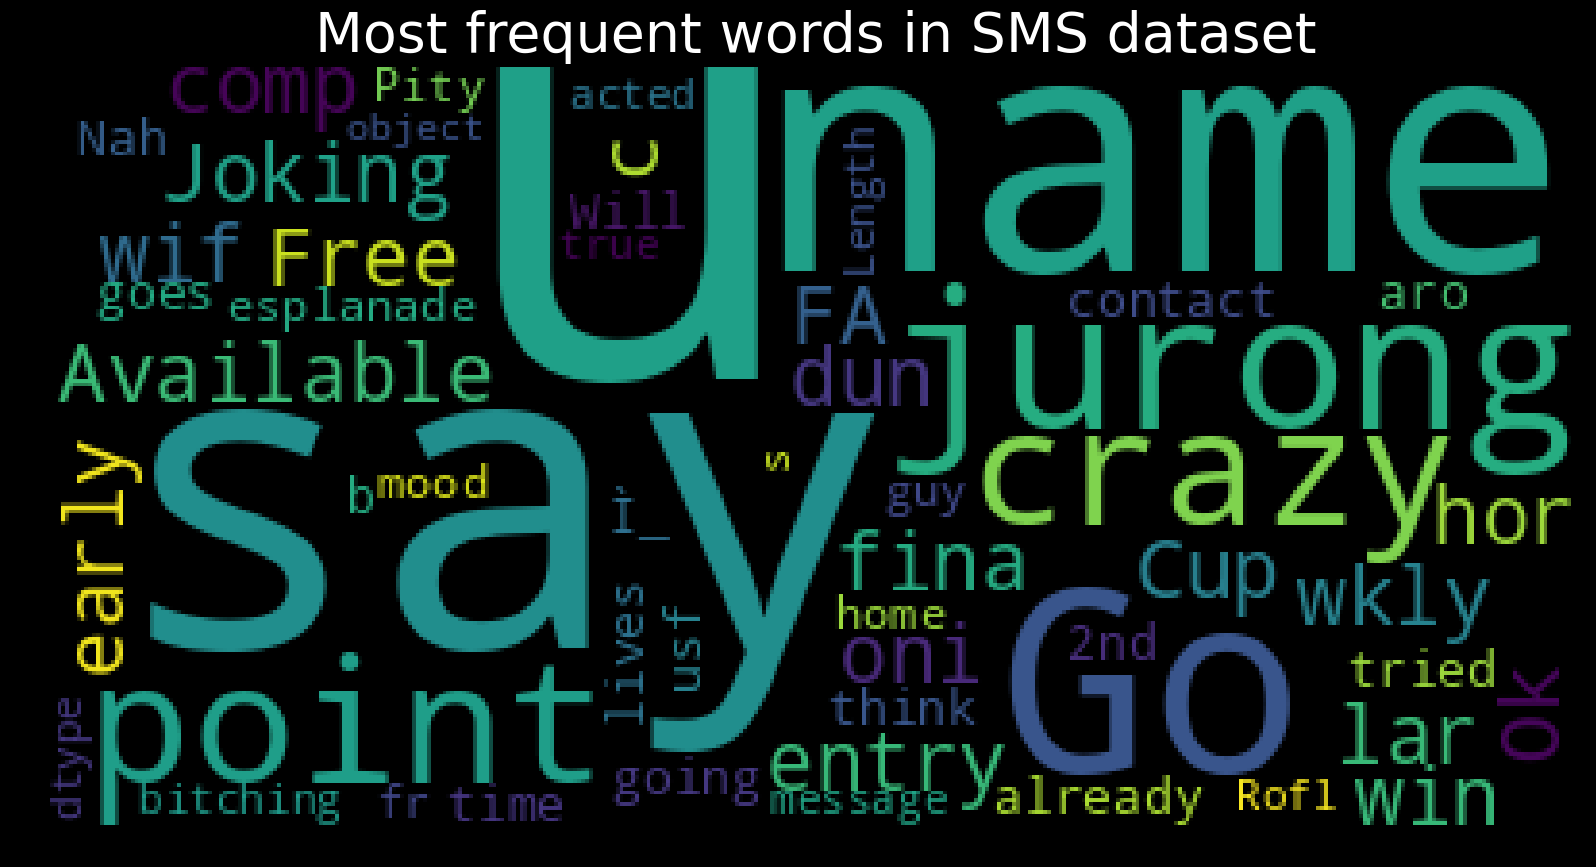

In [91]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud()
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(sms['message']))
# declare our figure
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Most frequent words in SMS dataset", fontsize=40,color='white')
plt.imshow(wc)
plt.show()